In [1]:
#!pip install xgboost
#!pip install pyspark
#!pip install plotly
#!pip install folium
from xgboost import XGBClassifier
import sys
import folium
import json
import requests
import os
import matplotlib.pyplot as plt
from datetime import datetime as dt
from datetime import timedelta as td
from dateutil.relativedelta import relativedelta as rt
import pyspark
import pandas as pd
from plotly import graph_objects as go
import numpy as np
import seaborn as sns
plt.style.use('ggplot')
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import utils
import time
from sklearn.metrics import classification_report
import joblib

Using TensorFlow backend.


In [2]:
datatrain_muestra_500=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_500.csv', header=0)
datatrain_muestra_300=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_300.csv', header=0)
datatrain_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_200.csv', header=0)
datatrain_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatrain_muestra_100.csv', header=0)

dataval_muestra_200=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_200.csv', header=0)
dataval_muestra_100=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_100.csv', header=0)
dataval_muestra_60=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_60.csv', header=0)
dataval_muestra_30=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/dataval_muestra_30.csv', header=0)

datatest_muestra_210=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_210.csv', header=0)
datatest_muestra_120=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_120.csv', header=0)
datatest_muestra_90=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_90.csv', header=0)
datatest_muestra_32=pd.read_csv('C:/Users/Maximiliano/Documents/Big_Data/TESIS_DE_MAESTRIA/Repositorio/mbd-2021-1/data/datasets/datatest_muestra_32.csv', header=0)

In [3]:
X_cols = ['merchant','amt','zip','job','Hora','Edad', 'category_food_dining','category_gas_transport',
          'category_grocery_net','category_grocery_pos','category_health_fitness','category_home',
          'category_kids_pets','category_misc_net','category_misc_pos','category_personal_care',
          'category_shopping_net','category_shopping_pos','category_travel','gender_M','week_Monday',
          'week_Saturday','week_Sunday','week_Thursday','week_Tuesday','week_Wednesday', 'distancia_cli_com', 
          'transacciones_60d','transacciones_24h','monto_prom_trans_60d']

Y_cols = ['is_fraud']

In [4]:
X_train_500 = datatrain_muestra_500[X_cols]
y_train_500 = datatrain_muestra_500[Y_cols]
X_val_200 = dataval_muestra_200[X_cols]
y_val_200 = dataval_muestra_200[Y_cols]
X_test_210 = datatest_muestra_210[X_cols]
y_test_210 = datatest_muestra_210[Y_cols]

In [5]:
X_train_300 = datatrain_muestra_300[X_cols]
y_train_300 = datatrain_muestra_300[Y_cols]
X_val_100 = dataval_muestra_100[X_cols]
y_val_100 = dataval_muestra_100[Y_cols]
X_test_120 = datatest_muestra_120[X_cols]
y_test_120 = datatest_muestra_120[Y_cols]

In [6]:
X_train_200 = datatrain_muestra_200[X_cols]
y_train_200 = datatrain_muestra_200[Y_cols]
X_val_60 = dataval_muestra_60[X_cols]
y_val_60 = dataval_muestra_60[Y_cols]
X_test_90 = datatest_muestra_90[X_cols]
y_test_90 = datatest_muestra_90[Y_cols]

In [7]:
X_train_100 = datatrain_muestra_100[X_cols]
y_train_100 = datatrain_muestra_100[Y_cols]
X_val_30 = dataval_muestra_30[X_cols]
y_val_30 = dataval_muestra_30[Y_cols]
X_test_32 = datatest_muestra_32[X_cols]
y_test_32 = datatest_muestra_32[Y_cols]

In [8]:
XGB = XGBClassifier()

In [9]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid_XGBM = {'max_depth'        : [None, 1, 3, 5, 10],
                   'subsample'        : [0.5, 1],
                   'learning_rate'    : [0.001, 0.01, 0.1],
                   'n_estimators'     : [200, 300, 500]}

In [10]:
#XGBM_GRID_BUSQUEDA = GridSearchCV(estimator=XGB, param_grid=param_grid_XGBM, cv = 3, verbose=1, n_jobs = -1)

In [11]:
#RFC_GRID_BUSQUEDA.fit(X_train, y_train)
#XGBM_GRID_BUSQUEDA_500=XGBM_GRID_BUSQUEDA.fit(X_train_500, y_train_500)
#XGBM_GRID_BUSQUEDA_300=XGBM_GRID_BUSQUEDA.fit(X_train_300, y_train_300)
#XGBM_GRID_BUSQUEDA_200=XGBM_GRID_BUSQUEDA.fit(X_train_200, y_train_200)
#XGBM_GRID_BUSQUEDA_100=XGBM_GRID_BUSQUEDA.fit(X_train_100, y_train_100)

In [12]:
#print(XGBM_GRID_BUSQUEDA_500.best_params_)
#print(XGBM_GRID_BUSQUEDA_300.best_params_)
#print(XGBM_GRID_BUSQUEDA_200.best_params_)
#print(XGBM_GRID_BUSQUEDA_100.best_params_)

In [13]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 07:58:00'

In [14]:
XGBM = XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=500, subsample=0.5)
XGBM.fit(X_train_500, y_train_500)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Maximiliano\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[07:58:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [15]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 08:03:29'

In [16]:
#predicción con datos de validación
XGBM_PRED_VAL = XGBM.predict(X_val_200)

In [17]:
print(classification_report(y_val_200, XGBM_PRED_VAL))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198825
           1       0.87      0.93      0.90      1175

    accuracy                           1.00    200000
   macro avg       0.93      0.96      0.95    200000
weighted avg       1.00      1.00      1.00    200000



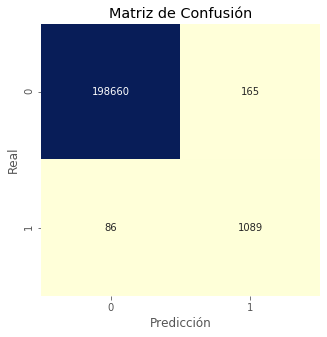

In [18]:
utils.plot_cm(y_val_200, XGBM_PRED_VAL)

PREDICCIÓN PARA DATOS DE TEST

In [19]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 08:03:31'

In [20]:
XGBM_PRED = XGBM.predict(X_test_210)

In [21]:
time.strftime('%Y-%m-%d %H:%M:%S', time.localtime())

'2021-11-22 08:03:32'

In [22]:
print(classification_report(y_test_210, XGBM_PRED))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209189
           1       0.74      0.86      0.79       811

    accuracy                           1.00    210000
   macro avg       0.87      0.93      0.90    210000
weighted avg       1.00      1.00      1.00    210000



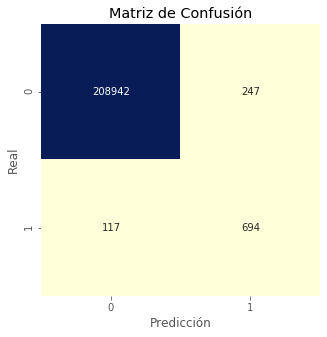

In [23]:
utils.plot_cm(y_test_210, XGBM_PRED)

In [24]:
joblib.dump(XGBM, 'XGBM_2.joblib') # Guardo el modelo.

['XGBM_2.joblib']

In [25]:
XGBM_ALTA = joblib.load('XGBM_2.joblib')

XGBM_predictions_120 = XGBM_ALTA.predict(X_test_120)
XGBM_predictions_90 = XGBM_ALTA.predict(X_test_90)
XGBM_predictions_32 = XGBM_ALTA.predict(X_test_32)

In [26]:
print(classification_report(y_test_120, XGBM_predictions_120))
print(classification_report(y_test_90, XGBM_predictions_90))
print(classification_report(y_test_32, XGBM_predictions_32))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    119545
           1       0.74      0.85      0.79       455

    accuracy                           1.00    120000
   macro avg       0.87      0.93      0.90    120000
weighted avg       1.00      1.00      1.00    120000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     89650
           1       0.74      0.87      0.80       350

    accuracy                           1.00     90000
   macro avg       0.87      0.93      0.90     90000
weighted avg       1.00      1.00      1.00     90000

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31887
           1       0.72      0.85      0.78       113

    accuracy                           1.00     32000
   macro avg       0.86      0.92      0.89     32000
weighted avg       1.00      1.00      1.00     32000



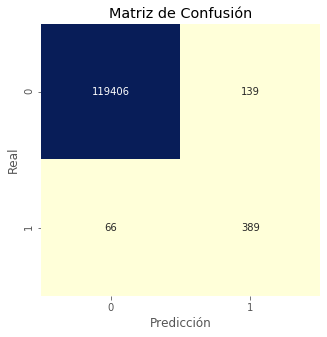

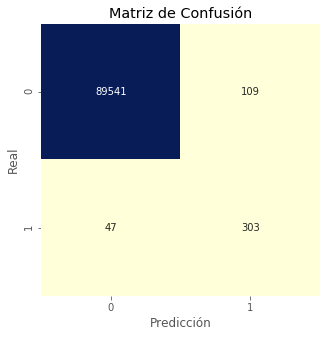

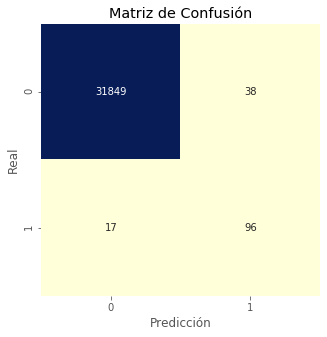

In [27]:
utils.plot_cm(y_test_120, XGBM_predictions_120)
utils.plot_cm(y_test_90, XGBM_predictions_90)
utils.plot_cm(y_test_32, XGBM_predictions_32)

IMPORTANCIA DE LAS VARIABLES

In [28]:
'''#por pureza de NODOS
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train_500.columns,
                             'importancia': XGBM_ALTA.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores.sort_values('importancia', ascending=False)'''

'#por pureza de NODOS\nimportancia_predictores = pd.DataFrame(\n                            {\'predictor\': X_train_500.columns,\n                             \'importancia\': XGBM_ALTA.feature_importances_}\n                            )\nprint("Importancia de los predictores en el modelo")\nprint("-------------------------------------------")\nimportancia_predictores.sort_values(\'importancia\', ascending=False)'

In [29]:
'''from sklearn.inspection import permutation_importance
import multiprocessing
#por permutación
importancia = permutation_importance(
                estimator    = XGBM_ALTA,
                X            = X_train_500,
                y            = y_train_500,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_500.columns
df_importancia.sort_values('importances_mean', ascending=False)'''

"from sklearn.inspection import permutation_importance\nimport multiprocessing\n#por permutación\nimportancia = permutation_importance(\n                estimator    = XGBM_ALTA,\n                X            = X_train_500,\n                y            = y_train_500,\n                n_repeats    = 5,\n                scoring      = 'neg_root_mean_squared_error',\n                n_jobs       = multiprocessing.cpu_count() - 1,\n                random_state = 123\n             )\n\n# Se almacenan los resultados (media y desviación) en un dataframe\ndf_importancia = pd.DataFrame(\n                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}\n                 )\ndf_importancia['feature'] = X_train_500.columns\ndf_importancia.sort_values('importances_mean', ascending=False)"